In [1]:
from unityagents import UnityEnvironment
# from mlagents_envs.environment import UnityEnvironment
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
no_graphics = False
env = UnityEnvironment(file_name='Tennis_Windows/Tennis', seed=1,no_graphics=no_graphics, worker_id=3)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24


In [ ]:
env.close()

In [4]:
import tools as ts
from deep_rl import *
first = [
    {'fc1': 13, 'fc2': 1, 'fc3': 2, 'act_layers': 1, 'crt_layers': 3, 'rollout_length': 18, 'discount': 13, 'gradient_clip': 3, 'lr': 13, 'gae_tau': 37, 'entropy_weight': 0.0010523877476856626, 'use_gae': True},    
    {'fc1': 20, 'fc2': 1, 'fc3': 2, 'act_layers': 1, 'crt_layers': 3, 'rollout_length': 18, 'discount': 1, 'gradient_clip': 14, 'lr': 4, 'gae_tau': 1, 'entropy_weight': 0.01930, 'use_gae': True},
    {'fc1': 5,  'fc2': 2, 'fc3': 2, 'act_layers': 1, 'crt_layers': 2, 'rollout_length': 19, 'discount': 1, 'gradient_clip': 14, 'lr': 16, 'gae_tau': 98, 'entropy_weight': 0.0014801239435424257, 'use_gae': False},
    {'fc1': 15, 'fc2': 1, 'fc3': 2, 'act_layers': 1, 'crt_layers': 3, 'rollout_length': 20, 'discount': 5, 'gradient_clip': 14, 'lr': 3, 'gae_tau': 2, 'entropy_weight': 0.019270316671225914, 'use_gae': True},
    {'fc1': 17, 'fc2': 2, 'fc3': 2, 'act_layers': 3, 'crt_layers': 3, 'rollout_length': 16, 'discount': 9, 'gradient_clip': 10, 'lr': 1, 'gae_tau': 90, 'entropy_weight': 0.008372146018688287, 'use_gae': False},
    {'fc1': 13, 'fc2': 1, 'fc3': 2, 'act_layers': 2, 'crt_layers': 3, 'rollout_length': 18, 'discount': 13, 'gradient_clip': 3, 'lr': 13, 'gae_tau': 38, 'entropy_weight': 0.0032874997705221176, 'use_gae': True},
    {'fc1': 13, 'fc2': 1, 'fc3': 2, 'act_layers': 2, 'crt_layers': 3, 'rollout_length': 18, 'discount': 13, 'gradient_clip': 3, 'lr': 13, 'gae_tau': 38, 'entropy_weight': 0.0032874997705221176, 'use_gae': True},

    # {'fc1': 8, 'fc2': 1,'fc3': 2, 'act_layers': 2, 'crt_layers': 2, 
     # 'rollout_length': 8, 'discount': 3, 'gradient_clip': 7, 'lr': 3, 'gae_tau': 10, 'entropy_weight': 0.01, 'use_gae': False},
#     {'fc1':512,'fc2':512,'rollout_length': 8,  'discount': 0.975120, 'gradient_clip': 7, 'lr': 0.000010, 'gae_tau': 0.996467, 'entropy_weight': 0.001504, 'use_gae': False},
#     {'fc1':512,'fc2':512,'rollout_length': 10, 'discount': 0.9847894774762507, 'gradient_clip': 2, 'lr': 1.0071160478803324e-05, 'gae_tau': 0.9899540738644809, 'entropy_weight': 0.0011836478393662721, 'use_gae': True},
]
space_cfg = [
        {'name' : 'fc1',               'type' : 'int', 'lb' : 1, 'ub' : 20},
        {'name' : 'fc2',               'type' : 'int', 'lb' : 1, 'ub' : 2},
        {'name' : 'fc3',               'type' : 'int', 'lb' : 1, 'ub' : 2},
        {'name' : 'act_layers',        'type' : 'int', 'lb' : 1, 'ub' : 3},
        {'name' : 'crt_layers',        'type' : 'int', 'lb' : 2, 'ub' : 3},
    
        {'name' : 'rollout_length',    'type' : 'int', 'lb' : 2, 'ub' : 20},
        {'name' : 'discount',          'type' : 'int', 'lb' : 1, 'ub' : 100},   
        {'name' : 'gradient_clip',     'type' : 'int', 'lb' : 1.0, 'ub' : 15.0},
        {'name' : 'lr',                'type' : 'int', 'lb' : 1, 'ub' : 100},
    
        {'name' : 'gae_tau',           'type' : 'int', 'lb' : 1, 'ub' : 100},
        {'name' : 'entropy_weight',    'type' : 'num', 'lb' : 0.0009, 'ub' : 0.02},
        {'name' : 'use_gae',           'type' : 'bool'},
    ]

In [5]:
config = ts.a2c_feature(state_size,action_size,brain_name,env)
agent = config.agent_fn(config)
torch.save(agent.network.state_dict(), 'checkpoint_test.pth')

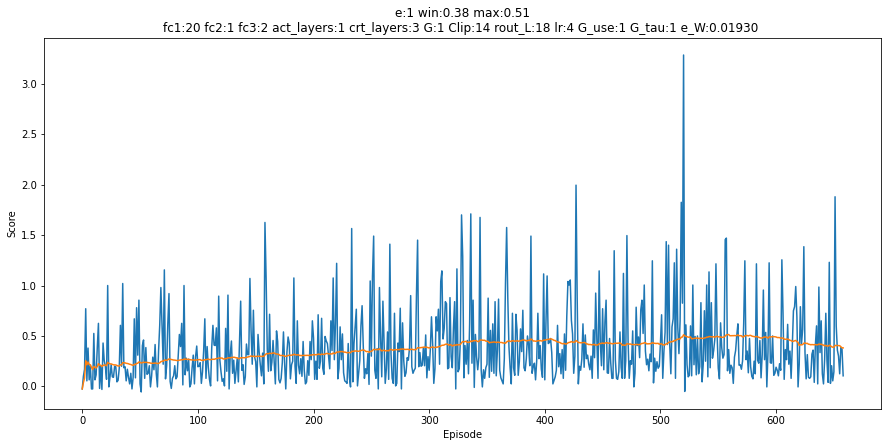

In [ ]:
select_device(-1)
config = ts.a2c_feature(state_size,action_size,brain_name,env)

config.save_margin = 0.9
config.save_postfix = 't2'

config.stop_regression=True
config.perc_regression=20
config.eval_episodes = 1500
config.scores_window = 100
config.num_workers = num_agents
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
best,scores = ts.tune(config,space_cfg,max_iter = 50,first=first,fig=fig,ax=ax,log_prefix='t2_')
print('Best:{}'.format(best) , flush = True)

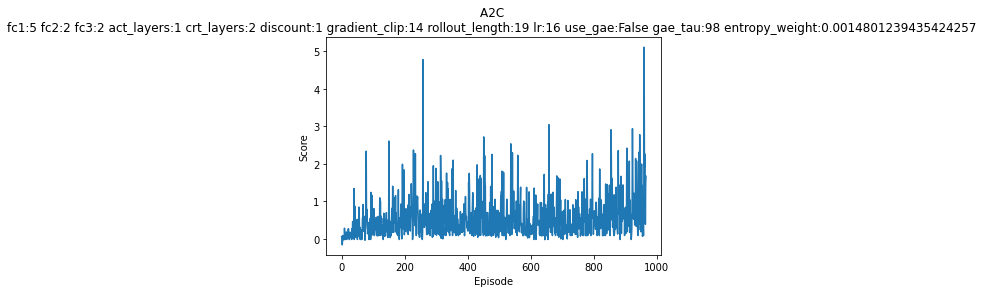

{{"fc1":5,"fc2":2,"fc3":2,"act_layers":1,"crt_layers":2,"discount":1,"gradient_clip":14,"rollout_length":19,"lr":16,"use_gae":False,"gae_tau":98,"entropy_weight":0.0014801239435424257,}


In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
# seed:{} '.format(config.seed)
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k])
# print(st)
plt.title("A2C \n{}".format(st))
plt.show()
st = '{{'
for k in config.update_fields:
    st += '"{}":{},'.format(k,best[k])

print(st+"}")

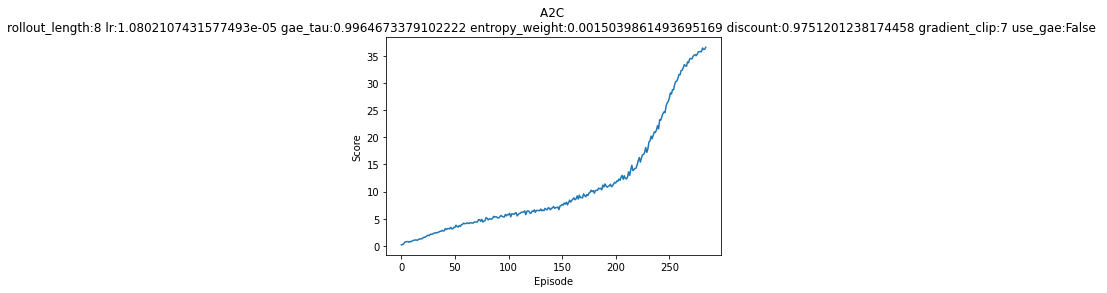

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k]) 
plt.title("A2C \n{}".format(st))
plt.show()

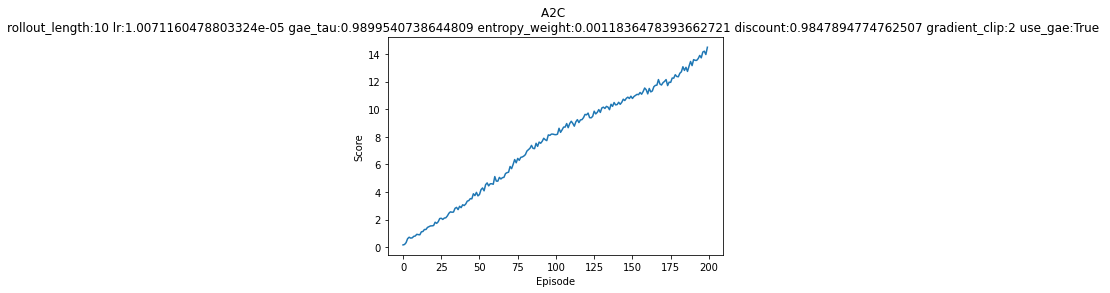

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k]) 
plt.title("A2C \n{}".format(st))
plt.show()

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k]) 
plt.title("A2C \n{}".format(st))
plt.show()

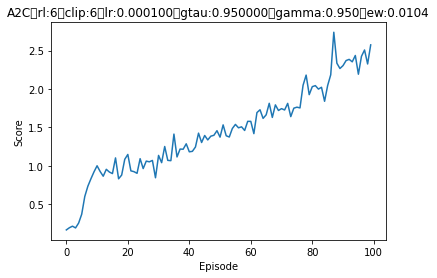

In [16]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.title("A2C rl:{} clip:{} lr:{:.6f} gtau:{:.6f} gamma:{:.3f} ew:{:.4f}".format(
    config.rollout_length,
    config.gradient_clip,
    config.lr,
    config.gae_tau,
    config.discount,
    config.entropy_weight))
plt.show()

In [17]:
print('Best:{}'.format(best) , flush = True)  

Best:{'rollout_length': 2, 'discount': 0.9, 'gradient_clip': 1, 'lr': 1e-05, 'gae_tau': 0.9, 'entropy_weight': 0.0009}
